# Problem Statement

### An Education company named X Education provides online courses to the industry professionals. It markets itself on Google and various other websites where viewers can browse about the online courses that they provide. When the viewers provide their email address and phone number, then they are considered as leads. The lead conversion rate for the company is around 30%, which is considered to be very low by the company. Company wants to increase its conversion rate  and they want to classify their leads as “hot leads” which are most potential and “cold leads” which are less potential. Company aims at target lead conversion rate to be 80%.

# Steps performed in the case study

### Following steps were performed in building of model and categorizing the leads as “hot leads” and “cold leads”:
#### 1. Reading of Data
#### 2. Understanding of Data
#### 3. Cleaning of Data
#### 4. Univariate and Bivariate Analysis
#### 5. Multivariate Analysis
#### 6. Data Preparation
#### 7. Train-Test Split
#### 8. Feature Scaling using Standard Scaler
#### 9. Feature Selection using RFE
#### 10. Model Building
#### 11. Model Evaluation
#### 12. Plotting of ROC curve
#### 13. Calculating optimal cut off point
#### 14. Calculating Sensitivity, Specificity, Accuracy
#### 15. Calculating Precision and Recall
#### 16. Prediction of Test set
#### 17. Deciding leads as “hot leads” and “cold leads” based on lead score.


# 1. Reading of Data

In [334]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
# supressing warings
import warnings
warnings.filterwarnings("ignore")

In [336]:
# importing csv file naming it "leads"
leads=pd.read_csv("Leads.csv")

# seeing the top 5 records of Leads file to get the idea about the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


# 2. Understanding of Data 

In [337]:
# lookig at the dimensions of data
leads.shape

(9240, 37)

In [338]:
# getting information about the columns of the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### By looking at the data we analyse that there are null values in few columns

In [339]:
# so we will look for the number of null values in each data frame
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### There are columns that have large number of null values.

In [340]:
# doing the descriptive analysis of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [341]:
# checking the current conversion rate of the leads
curr_conv_rate=round((sum(leads.Converted)/len(leads.Converted))*100,2)

In [342]:
curr_conv_rate # seeing the result

38.54

#### Current Conversion Rate is 38.54%, but company wants to increase this Rate to 80%

# 3. Cleaning of Data

## * Looking for the values as "Select" in each column

In [343]:
# Select is there in the columns because it might be the possibilty that customers has not filled.....
#         .....that particular field or might have left it willingly.
    

In [344]:
for i in leads.columns:
    print(i)
    print(leads[i].value_counts())
    

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1

In [345]:
# Repalcing Select with NaN as customers has not filled the details
leads1=leads.replace("Select", np.nan)

In [346]:
# Again looking at the records after replacemnt
leads1.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


#### We can see that Select has been replaced by NaN

## * Dropping of Columns that are not needed

In [347]:
# Dropping Prospect ID column as it is of no use in the analysis of data
leads1.drop(["Prospect ID"], 1, inplace=True)

In [348]:
# checking for records after dropping
leads1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [349]:
# checking for the null values percentage of each column
null_per=round((leads1.isnull().sum()/len(leads1))*100,2)

In [350]:
null_per # looking for the results

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [351]:
leads1.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [352]:
# creating the list of columns that have one unique value
unq1=["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]                        

In [353]:
# Dropping columns with one unique value as they will not help in analysis
leads2=leads1.drop(unq1, axis=1)

In [354]:
# checking for columns after dropping
leads2.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [355]:
# Again checking for the null values percentage of each column
null_per1=round((leads2.isnull().sum()/len(leads2))*100,2)
null_per1

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

## * Dropping of columns where null values are greater than or equal to 45%

In [356]:
# getting of columns where null values are more than 45%
null_per1[null_per1>=45.00]

How did you hear about X Education   78.46
Lead Quality                         51.59
Lead Profile                         74.19
Asymmetrique Activity Index          45.65
Asymmetrique Profile Index           45.65
Asymmetrique Activity Score          45.65
Asymmetrique Profile Score           45.65
dtype: float64

In [357]:
# dropping of these columns
leads2=leads2.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1 )

In [358]:
# checking for columns after dropping
leads2.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [359]:
# Again checking for the null values percentage of each column
null_per2=round((leads2.isnull().sum()/len(leads2))*100,2)
null_per2

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

## * Dropping of rows where null values are less than 10%

In [360]:
y=leads2.isnull().mean()*100 
y[(y>0.00) & (y<10.00)] # getting columns with null values greater than 0.00 and less than 10.00 and storing it in y

Lead Source            0.39
TotalVisits            1.48
Page Views Per Visit   1.48
Last Activity          1.11
dtype: float64

In [361]:
# creating list as "null_lst" of columns with null values greater than 0.00 and less than 10.00 
null_lst=["Lead Source","TotalVisits","Page Views Per Visit","Last Activity"] 

In [362]:
for i in null_lst:
    leads2=leads2[~ leads2[i].isnull()]  #removing null values from the column as null values are less in number

In [363]:
# Again checking for the null values percentage of each column
null_per3=round((leads2.isnull().sum()/len(leads2))*100,2)
null_per3

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                         25.30
Specialization                                  36.17
What is your current occupation                 29.57
What matters most to you in choosing a course   29.78
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

## * Treating null values of rest of the columns

###  "Country"

In [364]:
# looking for values in "Country" column
leads2.Country.value_counts(normalize=True)

India                  0.96
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Hong Kong              0.00
Bahrain                0.00
Oman                   0.00
France                 0.00
unknown                0.00
South Africa           0.00
Nigeria                0.00
Germany                0.00
Kuwait                 0.00
Canada                 0.00
Sweden                 0.00
China                  0.00
Asia/Pacific Region    0.00
Uganda                 0.00
Bangladesh             0.00
Italy                  0.00
Belgium                0.00
Netherlands            0.00
Ghana                  0.00
Philippines            0.00
Russia                 0.00
Switzerland            0.00
Vietnam                0.00
Denmark                0.00
Tanzania               0.00
Liberia                0.00
Malaysia               0.00
Kenya               

#### About 95% of the data points belong to India so this column might effect the analysis in wrong way, hence we will drop this column

In [365]:
leads2=leads2.drop("Country", axis=1)  # dropping of column

### "Specialization"

In [366]:
# looking for values in "Specialization" column
leads2.Specialization.value_counts(normalize=True)

Finance Management                  0.17
Human Resource Management           0.14
Marketing Management                0.14
Operations Management               0.09
Business Administration             0.07
IT Projects Management              0.06
Supply Chain Management             0.06
Banking, Investment And Insurance   0.06
Travel and Tourism                  0.03
Media and Advertising               0.03
International Business              0.03
Healthcare Management               0.03
E-COMMERCE                          0.02
Hospitality Management              0.02
Retail Management                   0.02
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.01
Name: Specialization, dtype: float64

#### Since Finance Management speciliazation is in majority so we will replace null values with Finance Management


In [367]:
leads2["Specialization"]=leads2["Specialization"].replace(np.nan,"Finance Management")

### "What is your current occupation"

In [368]:
# looking for values in "What is your current occupation" column
leads2["What is your current occupation"].value_counts(normalize=True)

Unemployed             0.86
Working Professional   0.11
Student                0.03
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: What is your current occupation, dtype: float64

#### Since What is your current occupation has 85% values as Unemployes we will replace null values with Unemployed 

In [369]:
leads2["What is your current occupation"]=leads2["What is your current occupation"].replace(np.nan,"Unemployed")

### "What matters most to you in choosing a course"

In [370]:
# looking for values in "What matters most to you in choosing a course" column
leads2["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects     1.00
Flexibility & Convenience   0.00
Other                       0.00
Name: What matters most to you in choosing a course, dtype: float64

#### Since 99% of values are Better Career Prospectus, if null values  will be replaced with Better Career Prospects , it might bias the result. So we will drop this column.

In [371]:
leads2=leads2.drop("What matters most to you in choosing a course", axis=1)  # dropping of column

### "Tags"

In [372]:
# looking for values in "Tags" column
leads2["Tags"].value_counts(normalize=True)

Will revert after reading the email                 0.35
Ringing                                             0.21
Interested in other courses                         0.09
Already a student                                   0.08
Closed by Horizzon                                  0.05
switched off                                        0.04
Busy                                                0.03
Lost to EINS                                        0.03
Not doing further education                         0.03
Interested  in full time MBA                        0.02
Graduation in progress                              0.02
invalid number                                      0.01
Diploma holder (Not Eligible)                       0.01
wrong number given                                  0.01
opp hangup                                          0.01
number not provided                                 0.00
in touch with EINS                                  0.00
Lost to Others                 

#### 35% tags have value " will revert after reading the email", so we will replace null values with this.

In [373]:
leads2["Tags"]=leads2["Tags"].replace(np.nan,"Will revert after reading the email") # replacing the values

### "City"

In [374]:
# looking for values in "City" column
leads2["City"].value_counts(normalize=True)

Mumbai                        0.58
Thane & Outskirts             0.14
Other Cities                  0.12
Other Cities of Maharashtra   0.08
Other Metro Cities            0.07
Tier II Cities                0.01
Name: City, dtype: float64

#### Repalcing null values with Mumbai as it is in majority

In [375]:
leads2["City"]=leads2["City"].replace(np.nan,"Mumbai") # replacing the values

In [376]:
# Again checking for the null values percentage of each column
round((leads2.isnull().sum()/len(leads2))*100,2)

Lead Number                              0.00
Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity             

#### We see that all the null values has been removed

In [377]:
leads2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [378]:
leads2.columns  #looking for columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [379]:
# Bifercating numeical and categorical columns as seperate list
cat_col=["Lead Origin","Lead Source","Do Not Email", "Do Not Call","Converted","Last Activity","Specialization",
         "What is your current occupation","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
        "Through Recommendations","Tags","City","A free copy of Mastering The Interview","Last Notable Activity"]
num_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

TotalVisits


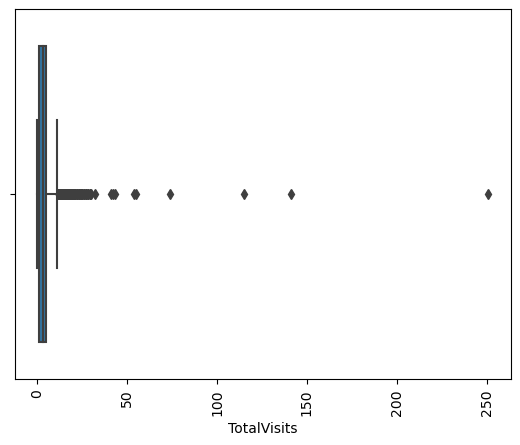

Total Time Spent on Website


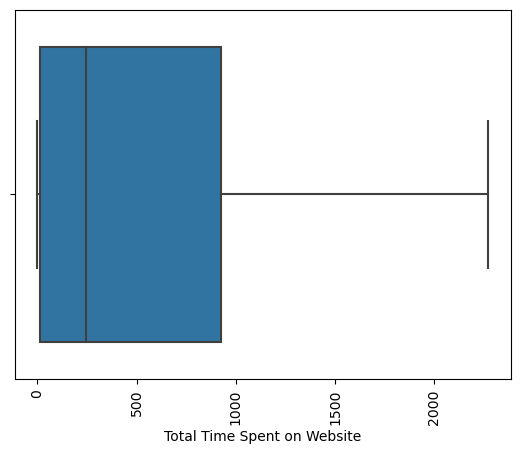

Page Views Per Visit


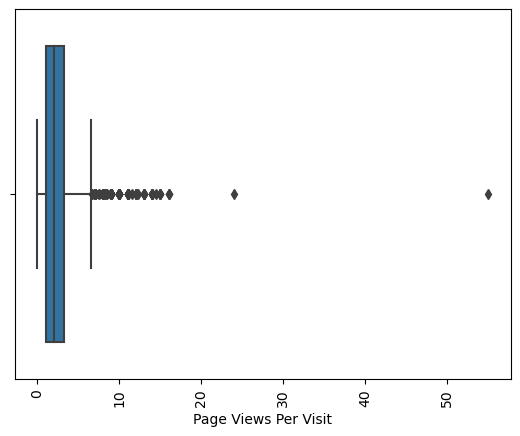

In [380]:
# ploting boxplots for checking for outliers in the numerical columns
for i in num_col:
    print(i)
    sns.boxplot(leads2[i])
    plt.xticks(rotation=90)
    plt.show()

#### TotalVisits and Page Views Per Visit has outliers so we will remove outliers by capping it to 95 percentile

In [381]:
# Capping of outliers for TotalVisits column
per_tiles=leads2["TotalVisits"].quantile([0.05,0.95]).values
leads2["TotalVisits"][leads2["TotalVisits"]<=per_tiles[0]]=per_tiles[0]
leads2["TotalVisits"][leads2["TotalVisits"]>=per_tiles[1]]=per_tiles[1]

In [382]:
# Capping of outliers for Page Views Per Visit column
per_tiles=leads2["Page Views Per Visit"].quantile([0.05,0.95]).values
leads2["Page Views Per Visit"][leads2["Page Views Per Visit"]<=per_tiles[0]]=per_tiles[0]
leads2["Page Views Per Visit"][leads2["Page Views Per Visit"]>=per_tiles[1]]=per_tiles[1]

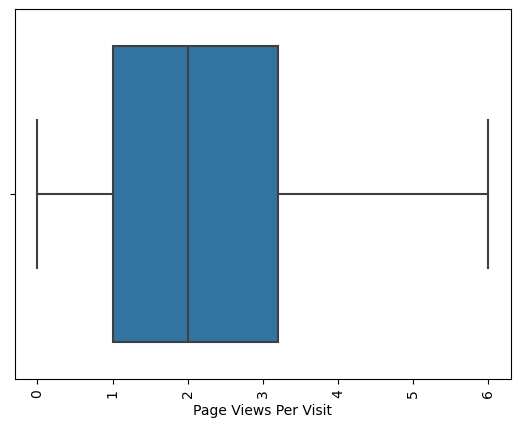

In [383]:
# again checking of outliers has been removed
sns.boxplot(leads2["Page Views Per Visit"])
plt.xticks(rotation=90)
plt.show()

# 4. Univariate and Bivariate Analysis

## * Univariate Analysis

Lead Origin


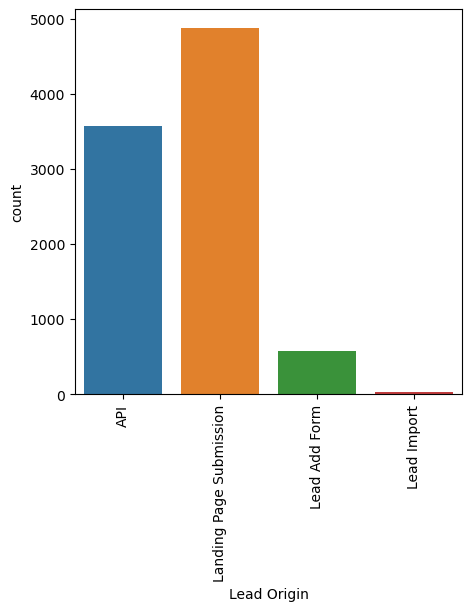

Lead Source


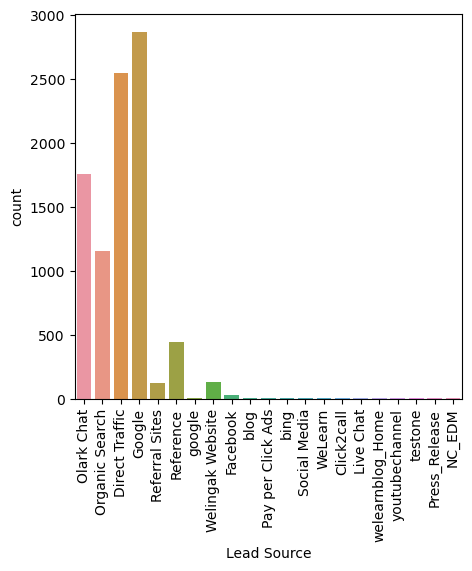

Do Not Email


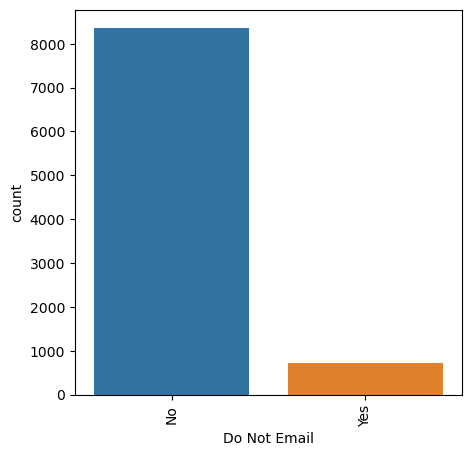

Do Not Call


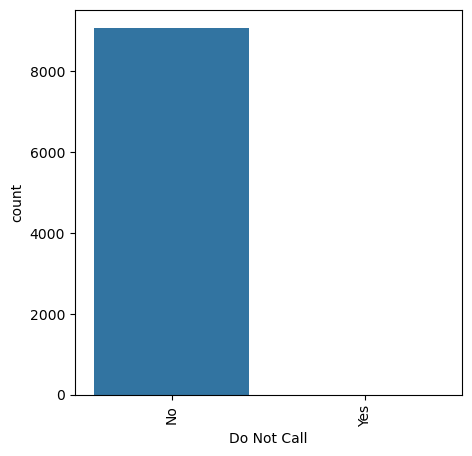

Converted


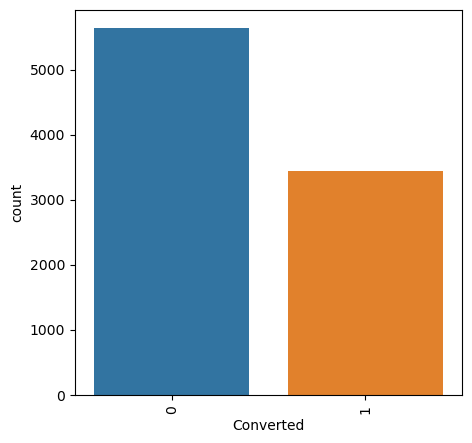

Last Activity


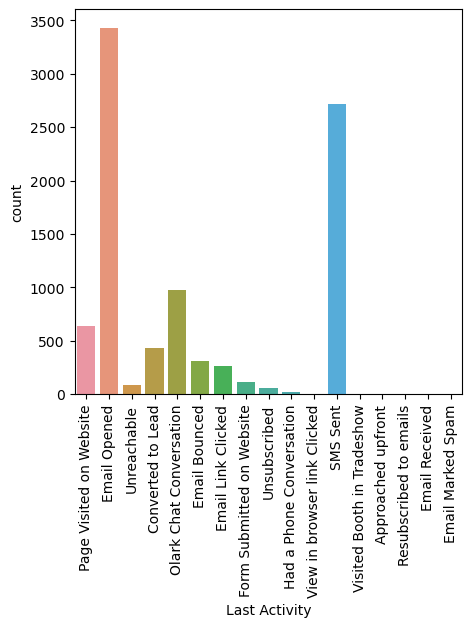

Specialization


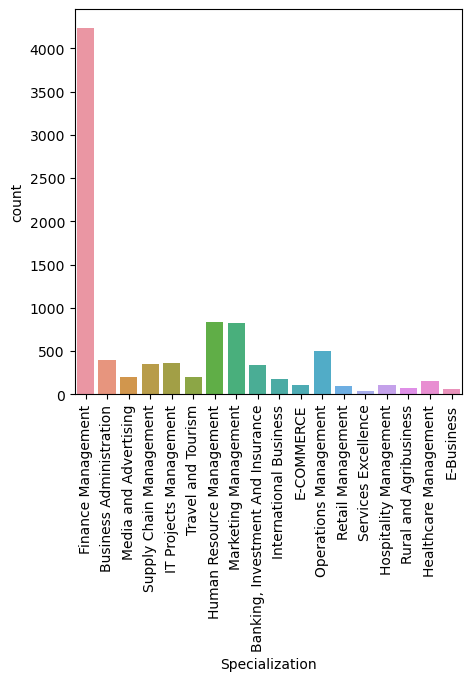

What is your current occupation


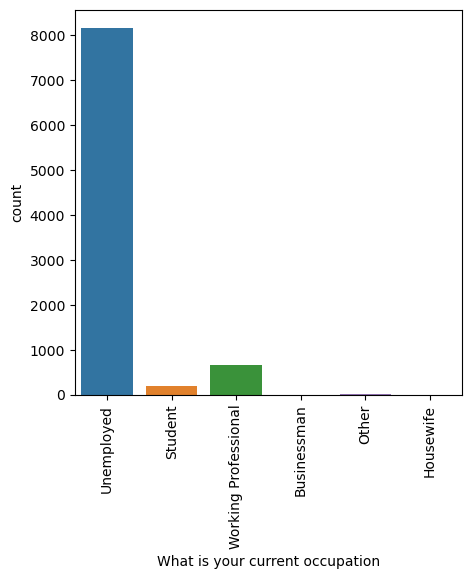

Search


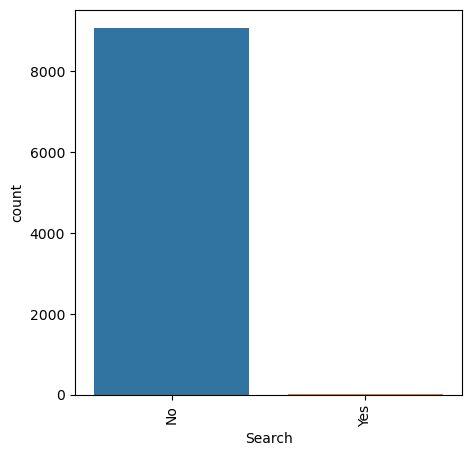

Newspaper Article


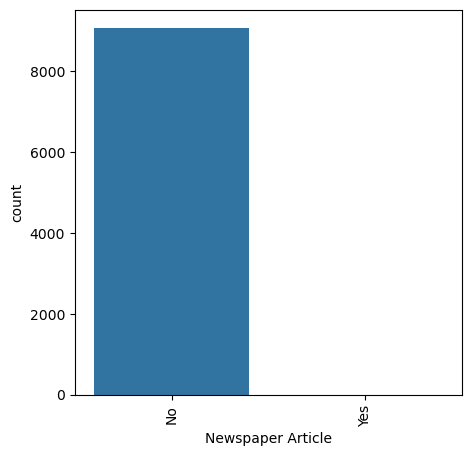

X Education Forums


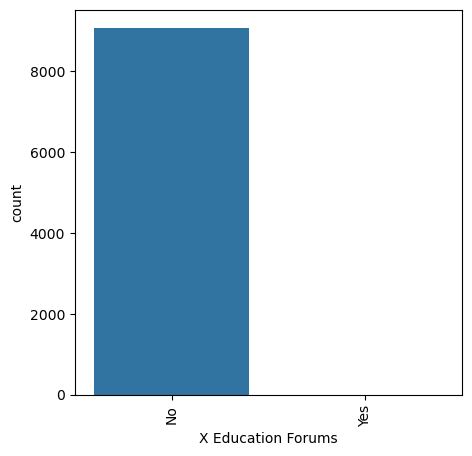

Newspaper


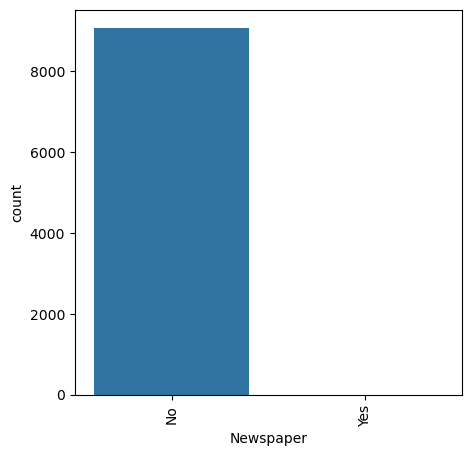

Digital Advertisement


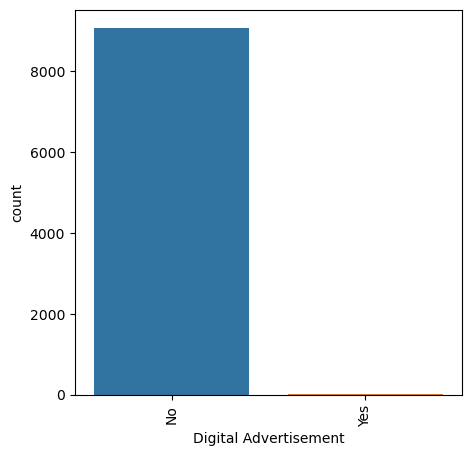

Through Recommendations


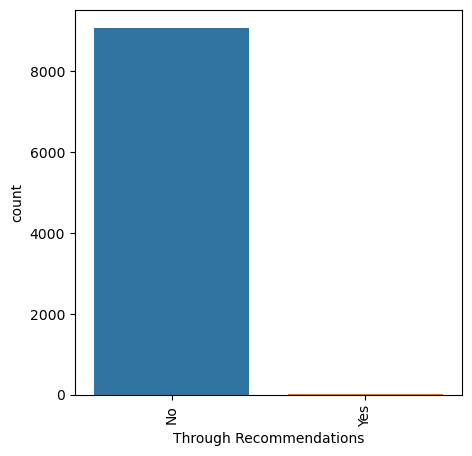

Tags


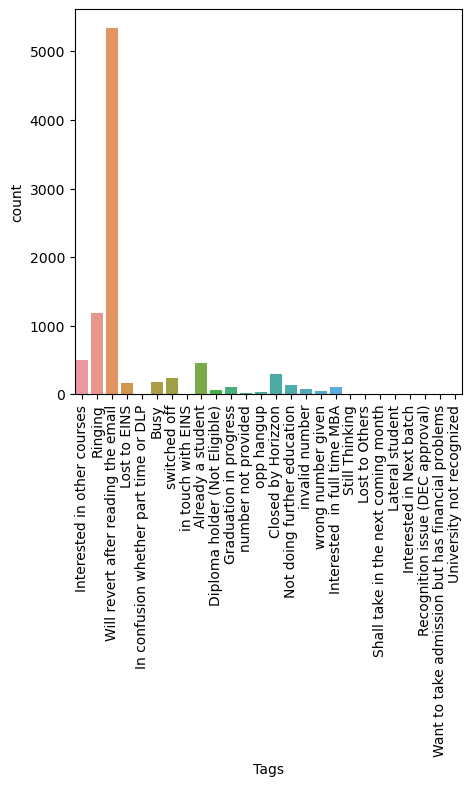

City


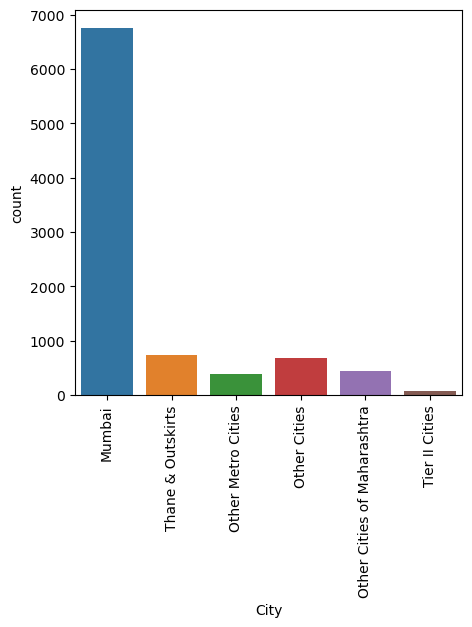

A free copy of Mastering The Interview


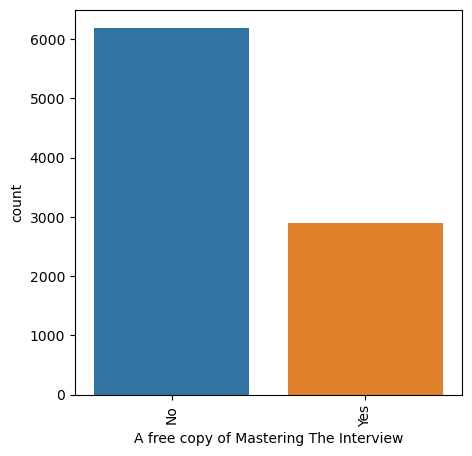

Last Notable Activity


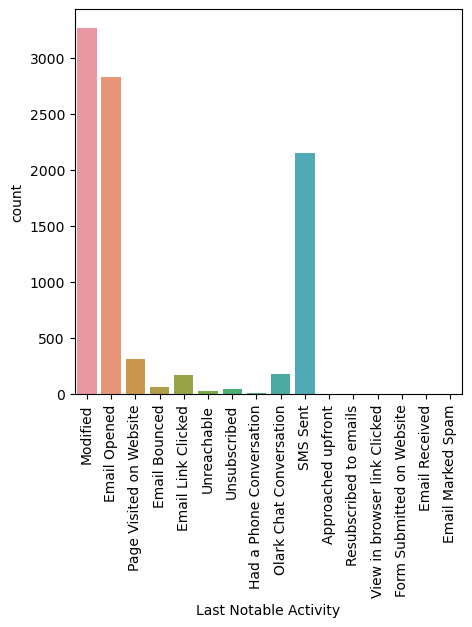

In [384]:
for i in cat_col:    # printing countplot for categorical variable
    print(i)
    plt.figure(figsize=(5,5), dpi=100)
    sns.countplot(x=leads2[i], data=leads2)
    plt.xticks(rotation=90)
    plt.show()

#### In Lead Source column , Google is written in two different ways so we combine it into one also there are few data points that are very less in number so we will include then in others

In [385]:
# replacing google to Google
leads2["Lead Source"]=leads2["Lead Source"].replace(["google"],"Google")

In [386]:
# replacing data points that are less in number to others
leads2["Lead Source"]=leads2["Lead Source"].replace(["Social Media","Live Chat","Press_Release","Pay per Click Ads","blog",
                                                  "WeLearn","welearnblog_Home","youtubechannel","testone","NC_EDM",
                                                    "Click2call","bing"],"Others")

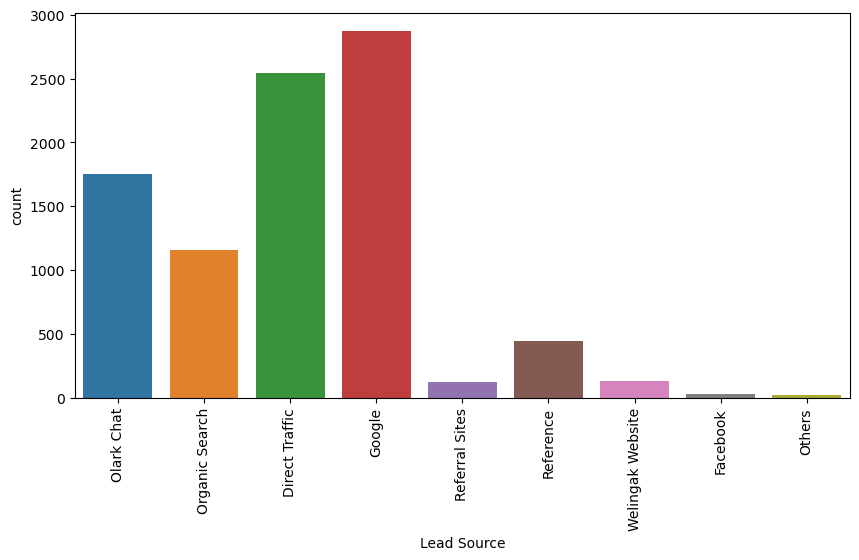

In [387]:
# checking for daat points after replacement
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x="Lead Source", data=leads2)
plt.xticks(rotation=90)
plt.show()

### Analysis:
#### 1. Most of leads were from Google as the Lead Source.
#### 2. Maximum Leads landed on Page Submission.
#### 3. Majority of Leads were not converted.
#### 4. Most number of leads were opened Email.
#### 5. Most leads have Finance Management as their Specialization.
#### 6. Majority of leads are from Mumbai and Majority of them are unemployed.

## * Bivariate Analysis

Lead Origin


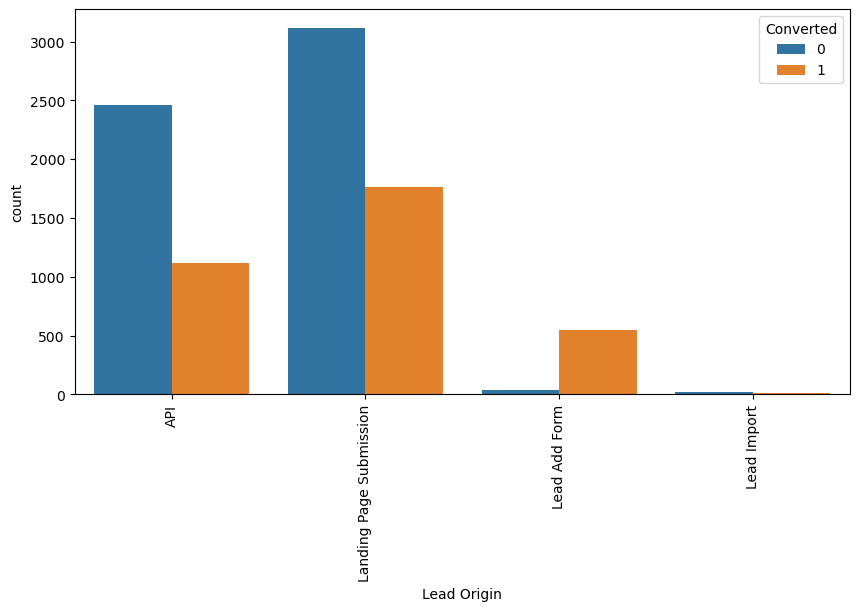

Lead Source


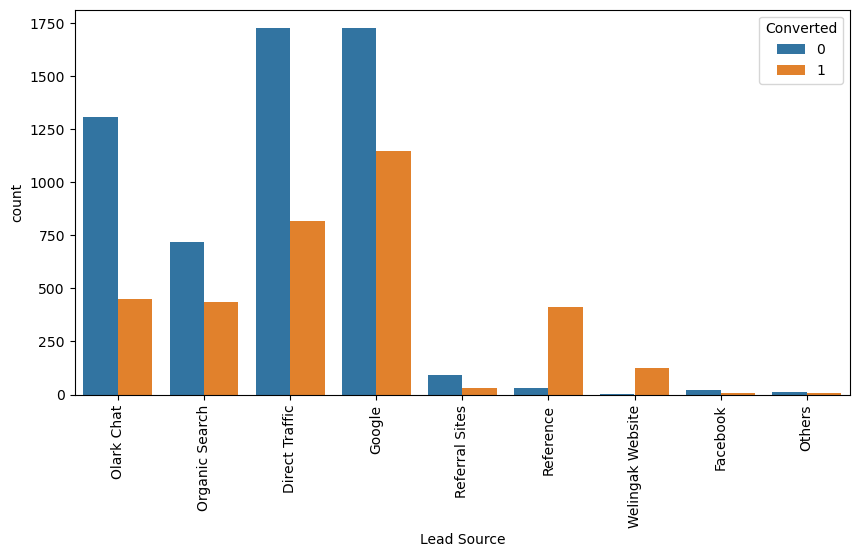

Do Not Email


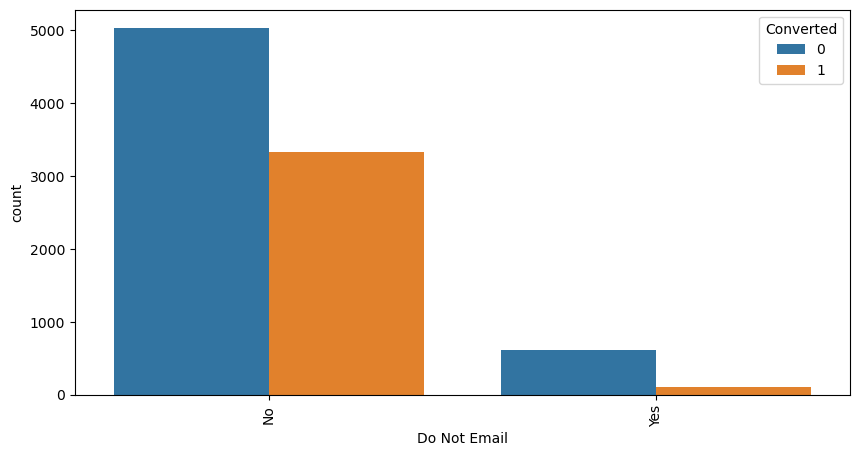

Do Not Call


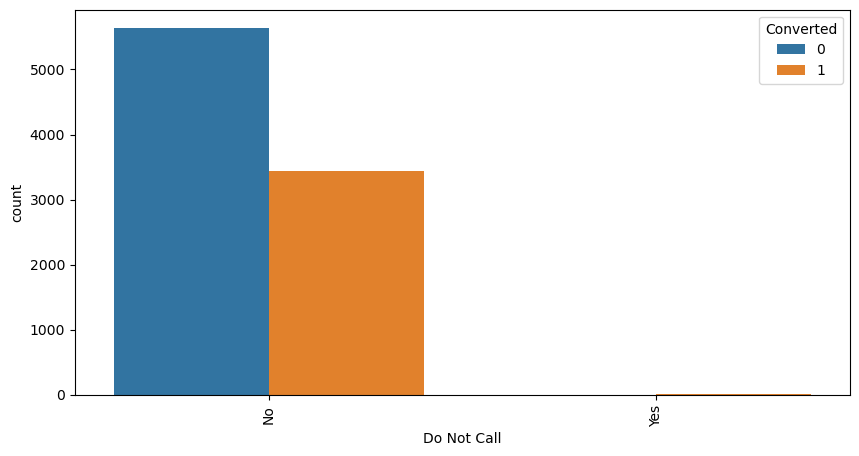

Converted


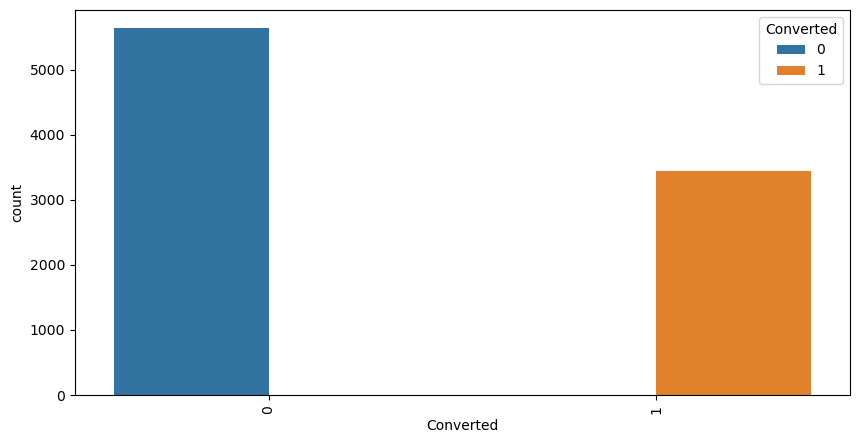

Last Activity


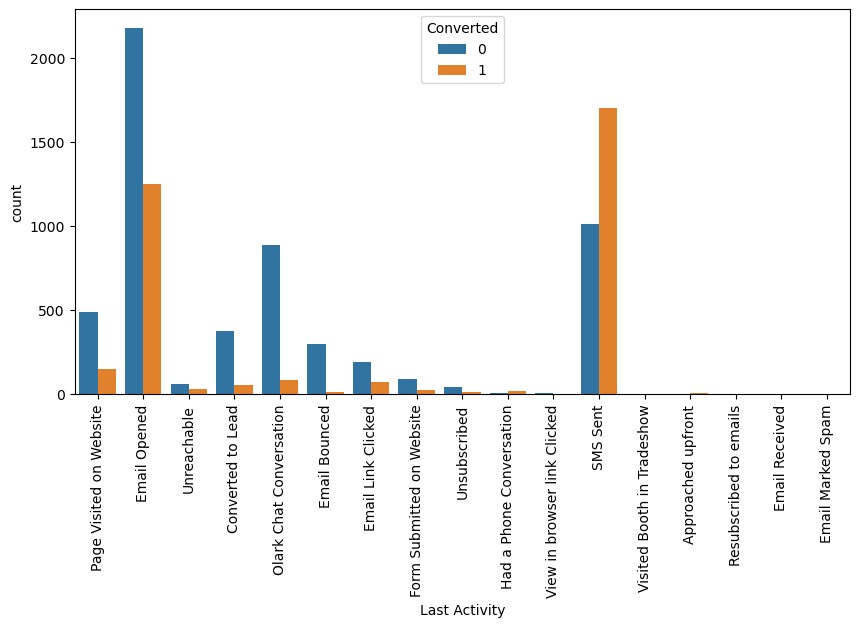

Specialization


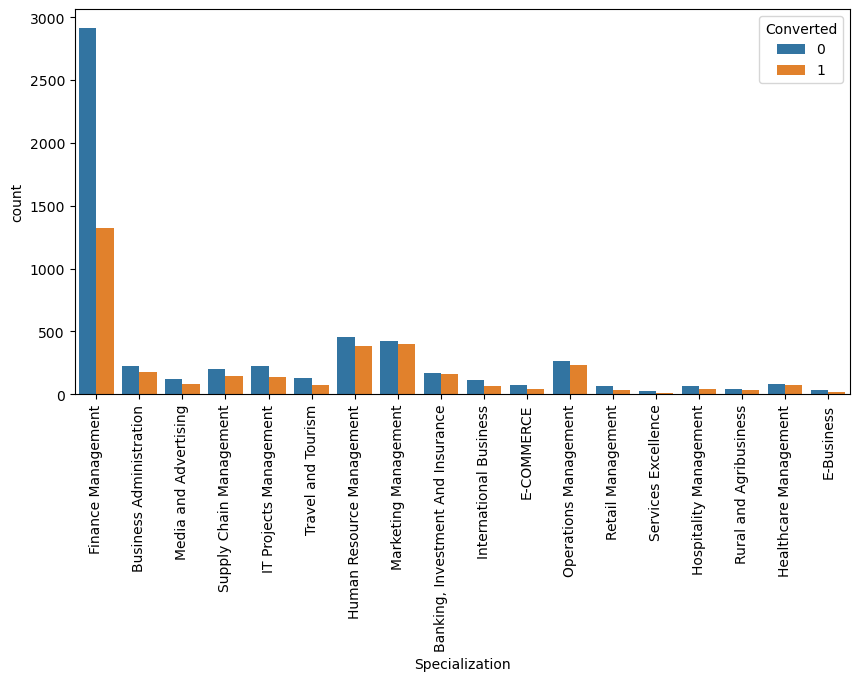

What is your current occupation


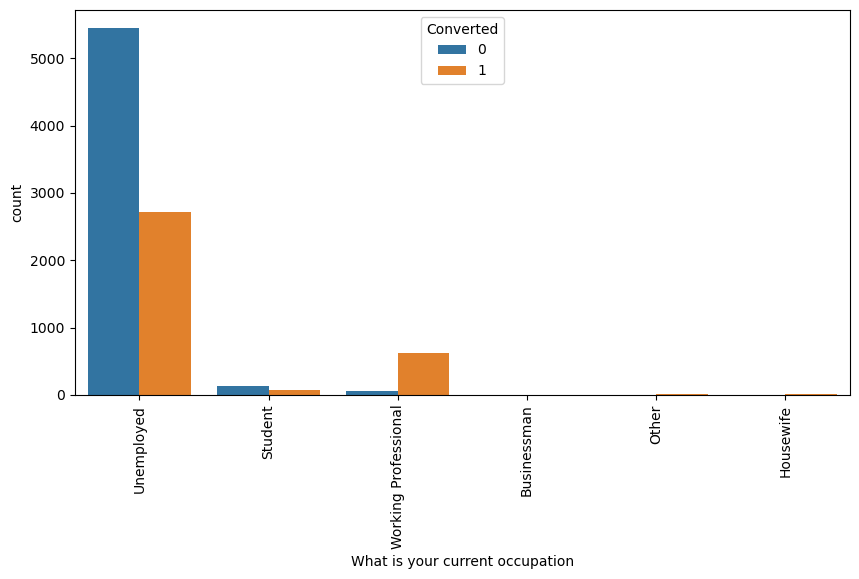

Search


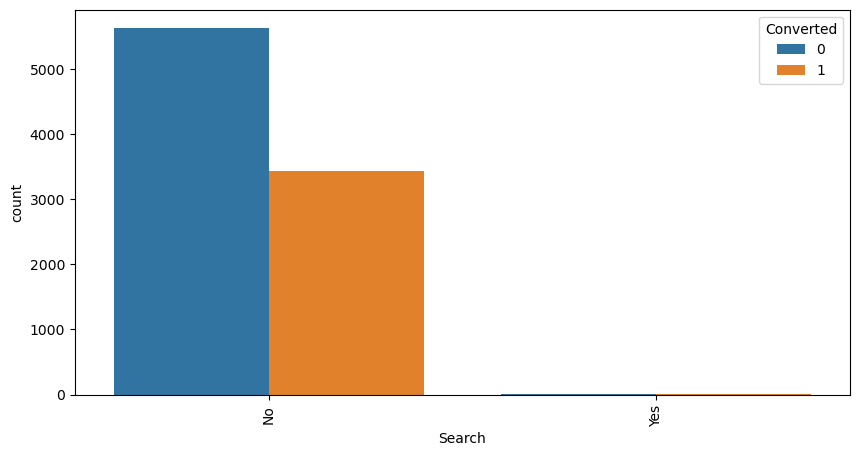

Newspaper Article


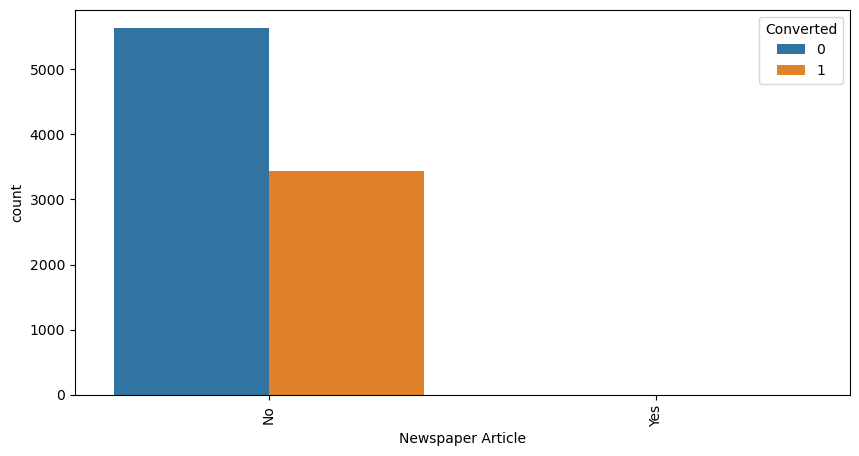

X Education Forums


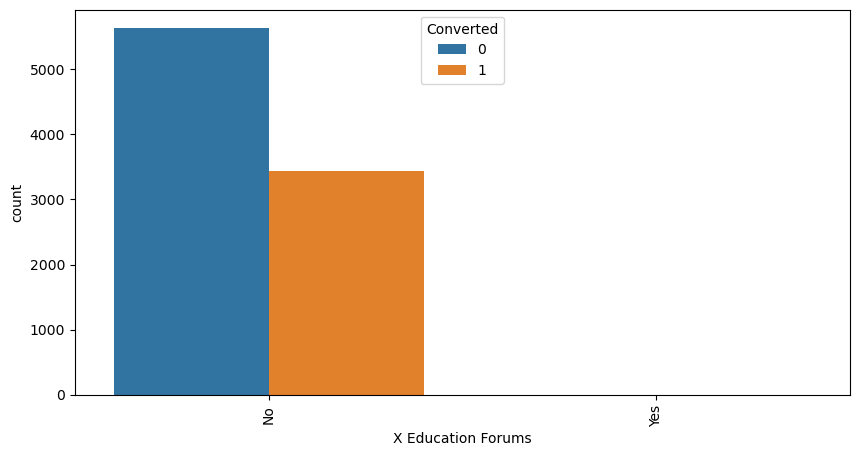

Newspaper


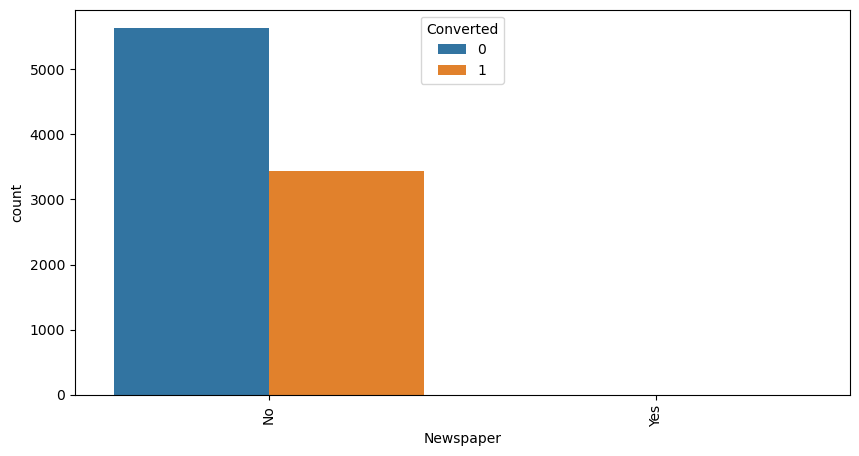

Digital Advertisement


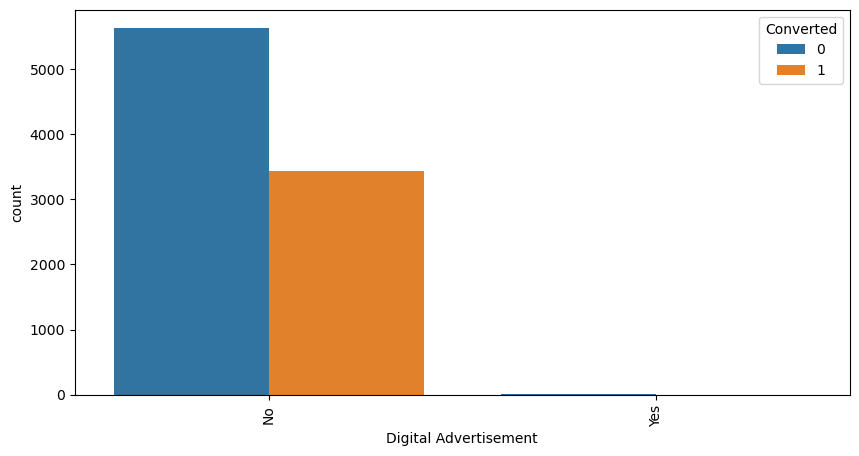

Through Recommendations


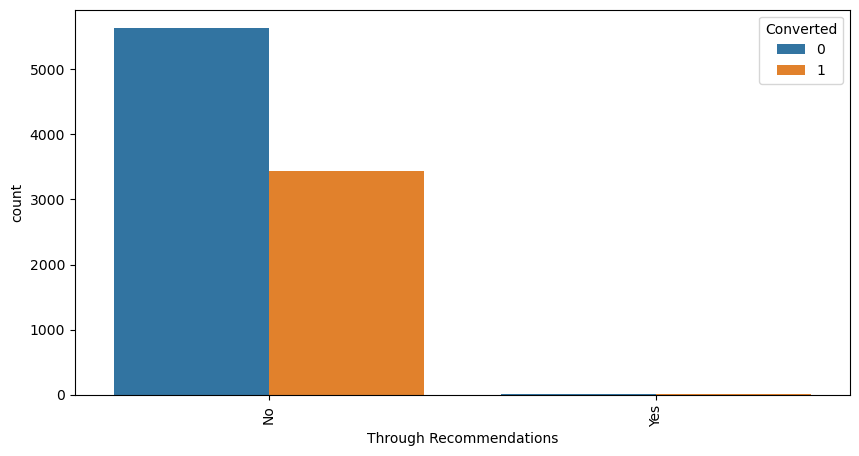

Tags


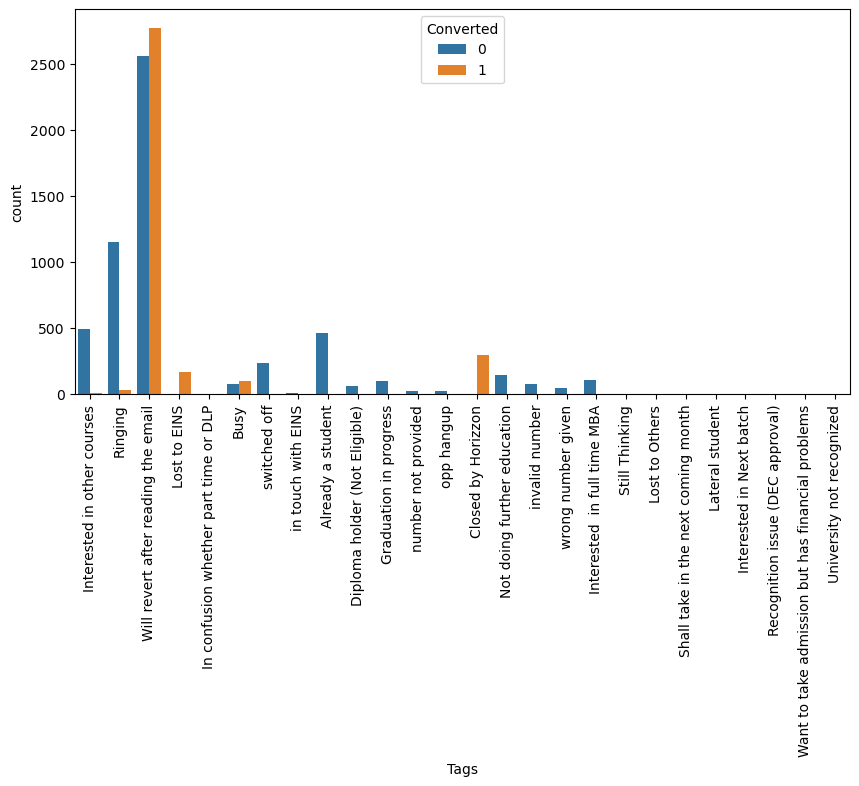

City


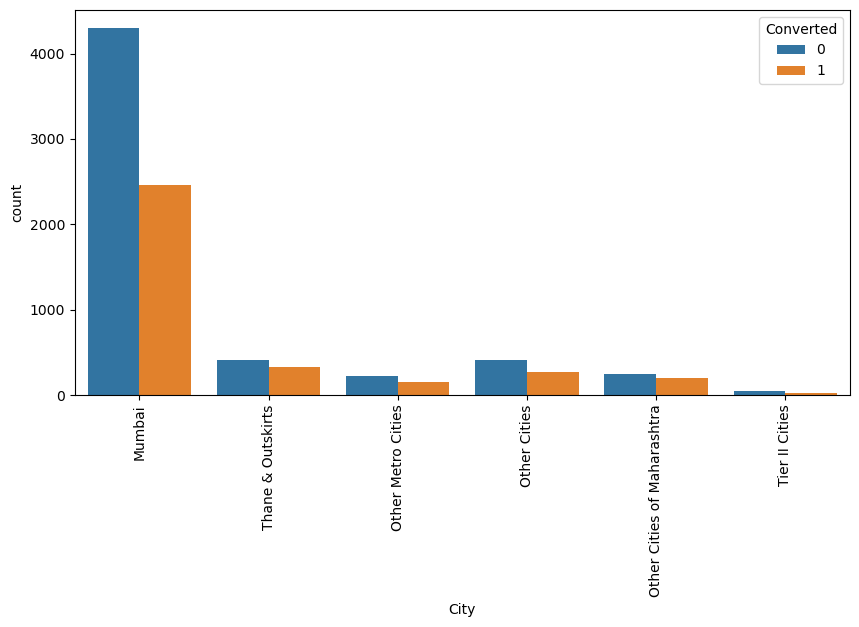

A free copy of Mastering The Interview


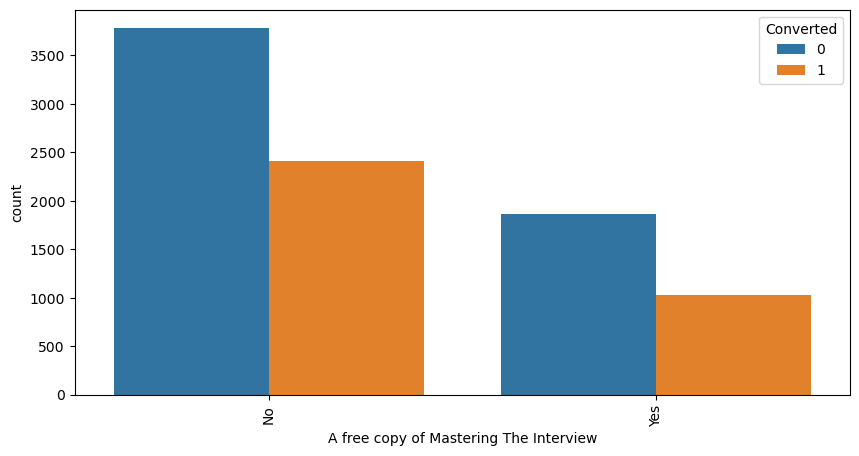

Last Notable Activity


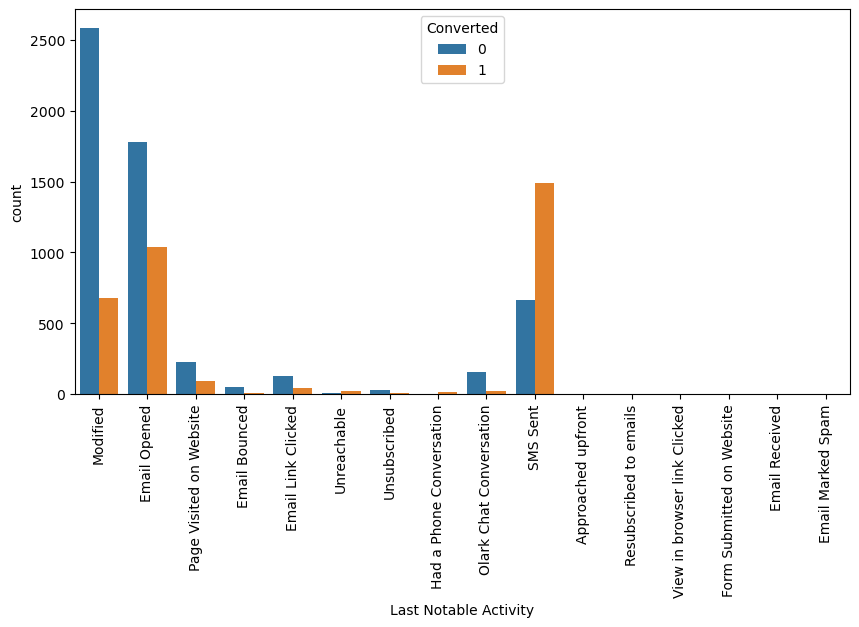

In [388]:
for i in cat_col:     # plotting countplot for the column
    print(i)
    plt.figure(figsize=(10,5), dpi=100)
    sns.countplot(x=leads2[i],hue="Converted", data=leads2)
    plt.xticks(rotation=90)
    plt.show()

### Analysis:
#### 1. The leads whose tags was "will revert after reading the email" were the ones who were mostly converted.
#### 2. Though Majority of leads are from Mumbai but still they most of them were not converted into customers.

# 5. Multivariate Analysis

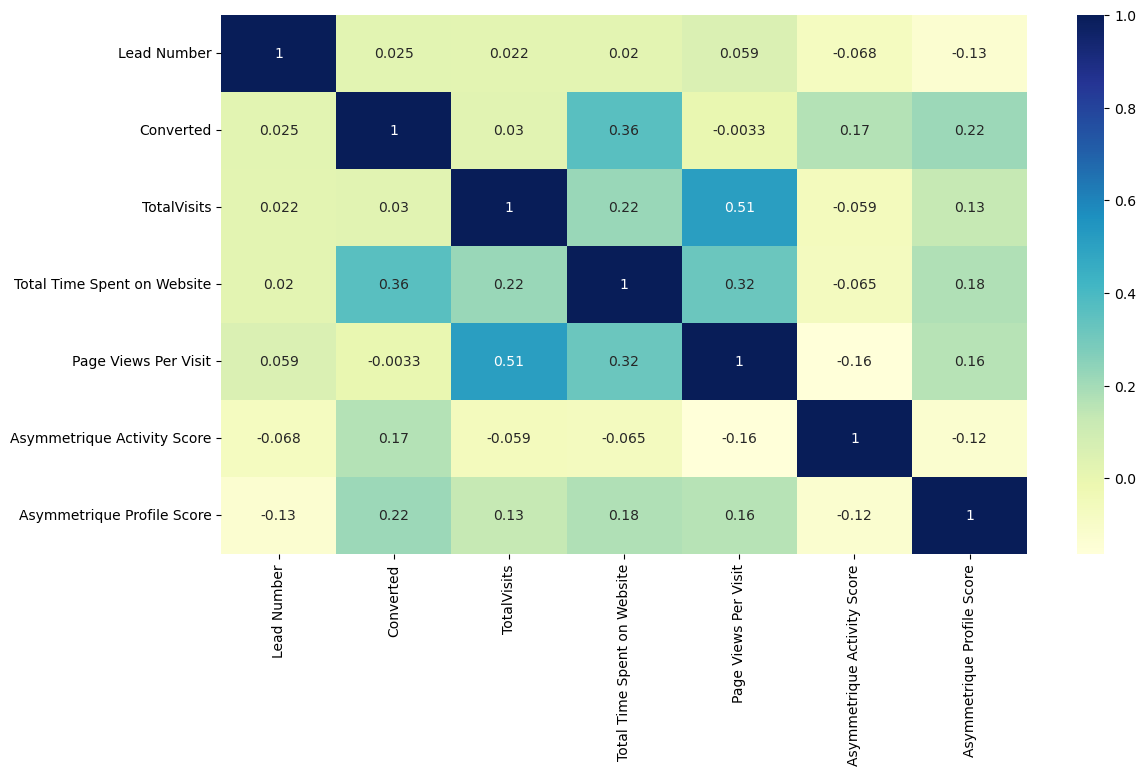

In [389]:
# Creating the co-relation matrix
plt.figure(figsize=(13,7))
sns.heatmap(leads.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Pages Views Per Visit and Lead Number are correlated to each other, Totalvisits and Pages Views Per Viwit are also correlated to each other, so one of them must ne removed to avoid multicollinearity.

In [390]:
# we will drop some of the columns
leads2=leads2.drop(["Lead Number"], 1)

In [391]:
# dropping some more columns that doesn't contribute in analysis
leads2=leads2.drop(["Search","Through Recommendations","Newspaper","Newspaper Article","X Education Forums",
                    "Digital Advertisement"], 1)

In [392]:
# checking for final columns
leads2.columns    

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [393]:
# checking for final data
leads2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [394]:
leads2.nunique()

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Last Activity                               17
Specialization                              18
What is your current occupation              6
Tags                                        26
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

# 6. Data Preparation

### * Mapping of binary variables

In [395]:
# Converting Yes/No to 1/0 for binary variables
bin1=["Do Not Email","Do Not Call","A free copy of Mastering The Interview"]
for i in bin1:
    leads2[i]=leads2[i].map({"Yes" : 1, "No" : 0})

In [396]:
# Checking for the mapped values
leads2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### * Creation of Dummy variables

In [397]:
# creating the list of columns whose dummy variables has to be created
dummy1=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
        "Tags","City","Last Notable Activity"]
dummy_values=pd.get_dummies(leads2[dummy1], drop_first=True)

In [398]:
# combining leads2 dataframe with dummy variables
leads2=pd.concat([leads2, dummy_values], axis=1)


In [399]:
# checking for the data
leads2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Finance Management,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Finance Management,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Finance Management,...,0,0,1,0,0,0,0,0,0,0


In [400]:
# creating list of columns to be dropped
drop_col=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
        "Tags","City","Last Notable Activity","Lead Source_Others"]
# dropping original ctegorical columns after their dummy variables has been created
leads2=leads2.drop(drop_col, axis=1)

In [401]:
# checking for data
leads2.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.00,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.00,674,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.00,1532,2.00,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.00,305,1.00,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.00,1428,1.00,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [402]:
# checking dimensions of dataframe
leads2.shape

(9074, 100)

# 7. Test -Train Split

In [403]:
# importing important libraries
from sklearn.model_selection import train_test_split

In [404]:
# defining X and y variable
X=leads2.drop(["Converted"], axis=1)
y=leads2["Converted"]

In [405]:
# train-test splitting
X_train,X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, random_state=100)

# 8. Feature Scaling

In [406]:
# importing library
from sklearn.preprocessing import StandardScaler

In [407]:
# creating scaler object
scaler=StandardScaler()
# applying scaling on numerical columns
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [408]:
# checking data of X_train
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 9. Feature Selection

In [409]:
# Using Recursive Feature Elimination method to do feature selection
# importing important library for this
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [410]:
# using RFE to get top 15 variables that will effect the  target variable
logis_reg=LogisticRegression()
rfe=RFE(logis_reg, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [411]:
# looking for variables that were selected using RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 59),
 ('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 52),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 73),
 ('Lead Source_Olark Chat', False, 23),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', False, 2),
 ('Last Activity_Converted to Lead', False, 39),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 82),
 ('Last Activity_Email Marked Spam', False, 31),
 ('Last Activity_Email Opened', False, 42),
 ('Last Activity_Email Received', False, 75),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity

In [412]:
# getting list of columns that has RFE support
supp_col=X_train.columns[rfe.support_]
supp_col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [413]:
# seeing columns that were not supported by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow

# 10. Model Building

In [414]:
# Building first model
X_train_sm=sm.add_constant(X_train[supp_col])
log_reg1=sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
result1=log_reg1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.5
Date:                Sun, 21 May 2023   Deviance:                       4131.0
Time:                        22:09:59   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5687      0.294     -8.742      0.000      -3.145      -1.993
Do Not Email                                            -1.8245      0.200     -9.130      0.000      -2.216      -1.433
Lead Origin_Lead Add Form                                2.7581      0.253     10.887      0.000       2.262       3.255
Last Activity_Had a Phone Conversation                   3.0756      0.975      3.154      0.002       1.164       4.987
Last Activity_Unsubscribed                               2.6659      0.540      4.936      0.000       1.607       3.724
What is your current occupation_Unemployed              -1.7288      0.274     -6.301      0.000      -2.266      -1.191
What is your current occupation_Working Professional     1.2690      0.346      3.671      0.000       0.592       1.946
Tags_Busy                                                3.0679      0.310      9.881      0.000       2.459       3.676
Tags_Closed by Horizzon                                  8.2920      0.744     11.139      0.000       6.833       9.751
Tags_Interested in Next batch                           26.5213   5.84e+04      0.000      1.000   -1.14e+05    1.14e+05
Tags_Lost to EINS                                        8.2232      0.748     11.001      0.000       6.758       9.688
Tags_Ringing                                            -1.4361      0.328     -4.373      0.000      -2.080      -0.792
Tags_Will revert after reading the email                 3.5496      0.209     16.992      0.000       3.140       3.959
Tags_invalid number                                    -21.6893   1.47e+04     -0.001      0.999   -2.87e+04    2.87e+04
Tags_switched off                                       -1.1491      0.560     -2.050      0.040      -2.247      -0.051
Last Notable Activity_SMS Sent                           2.8367      0.113     25.083      0.000       2.615       3.058
========================================================================================================================
"""

#### "Tags_Interested in Next batch" and "Tags_invalid number" has p value greater than 0.05 which is higher than the threshold so we will drop these columns

In [415]:
# dropping both the columns
supp_col1=supp_col.drop(["Tags_Interested in Next batch","Tags_invalid number"], 1)

In [416]:
# checking for columns after dropping
supp_col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [417]:
# Building new model 2
X_train_sm=sm.add_constant(X_train[supp_col1])
log_reg2=sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
result2=log_reg2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.5
Date:                Sun, 21 May 2023   Deviance:                       4152.9
Time:                        22:09:59   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5932      0.292     -8.876      0.000      -3.166      -2.021
Do Not Email                                            -1.7907      0.198     -9.041      0.000      -2.179      -1.403
Lead Origin_Lead Add Form                                2.7714      0.253     10.958      0.000       2.276       3.267
Last Activity_Had a Phone Conversation                   3.0764      0.975      3.156      0.002       1.166       4.987
Last Activity_Unsubscribed                               2.6157      0.535      4.887      0.000       1.567       3.665
What is your current occupation_Unemployed              -1.7386      0.274     -6.341      0.000      -2.276      -1.201
What is your current occupation_Working Professional     1.2652      0.347      3.649      0.000       0.586       1.945
Tags_Busy                                                3.1030      0.302     10.286      0.000       2.512       3.694
Tags_Closed by Horizzon                                  8.3242      0.741     11.226      0.000       6.871       9.777
Tags_Lost to EINS                                        8.2541      0.744     11.087      0.000       6.795       9.713
Tags_Ringing                                            -1.4014      0.319     -4.394      0.000      -2.026      -0.776
Tags_Will revert after reading the email                 3.5827      0.198     18.089      0.000       3.194       3.971
Tags_switched off                                       -1.1125      0.555     -2.005      0.045      -2.200      -0.025
Last Notable Activity_SMS Sent                           2.8324      0.112     25.334      0.000       2.613       3.052
========================================================================================================================
"""

#### We see that the p value is within the threshold, so now we will look for Variance Inflation Factor

### * Variance Inflation Factor

In [418]:
# calculating vif for the variables
vif=pd.DataFrame()
vif["Features"]=X_train[supp_col1].columns
vif["VIF"]=[variance_inflation_factor(X_train[supp_col1].values, i) for i in range(X_train[supp_col1].shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)

In [419]:
# looking for vif values
vif

,Features,VIF
4,What is your current occupation_Unemployed,5.11
10,Tags_Will revert after reading the email,4.38
9,Tags_Ringing,1.78
5,What is your current occupation_Working Profes...,1.54
12,Last Notable Activity_SMS Sent,1.50
7,Tags_Closed by Horizzon,1.30
1,Lead Origin_Lead Add Form,1.23
0,Do Not Email,1.16
11,Tags_switched off,1.16
6,Tags_Busy,1.13


#### "What is your current occupation_Unemployed" has vif value 5.11, which is higher than the threshold ,so we will drop this column

In [420]:
# dropping of the columns
supp_col2=supp_col1.drop(["What is your current occupation_Unemployed"], 1)

In [421]:
# checking for columns after dropping
supp_col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [422]:
# Building new model 3
X_train_sm=sm.add_constant(X_train[supp_col2])
log_reg3=sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
result3=log_reg3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.0
Date:                Sun, 21 May 2023   Deviance:                       4194.1
Time:                        22:09:59   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4897
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1394      0.193    -21.450      0.000      -4.518      -3.761
Do Not Email                                            -1.7500      0.197     -8.892      0.000      -2.136      -1.364
Lead Origin_Lead Add Form                                2.7873      0.250     11.143      0.000       2.297       3.278
Last Activity_Had a Phone Conversation                   3.0416      0.975      3.120      0.002       1.131       4.952
Last Activity_Unsubscribed                               2.5271      0.531      4.762      0.000       1.487       3.567
What is your current occupation_Working Professional     2.9324      0.228     12.857      0.000       2.485       3.379
Tags_Busy                                                2.9296      0.297      9.857      0.000       2.347       3.512
Tags_Closed by Horizzon                                  8.1537      0.740     11.020      0.000       6.703       9.604
Tags_Lost to EINS                                        8.0662      0.743     10.860      0.000       6.610       9.522
Tags_Ringing                                            -1.5711      0.316     -4.974      0.000      -2.190      -0.952
Tags_Will revert after reading the email                 3.4263      0.194     17.668      0.000       3.046       3.806
Tags_switched off                                       -1.2772      0.553     -2.309      0.021      -2.361      -0.193
Last Notable Activity_SMS Sent                           2.8054      0.111     25.316      0.000       2.588       3.023
========================================================================================================================
"""

In [423]:
# looking for vif
# calculating vif for the variables
vif=pd.DataFrame()
vif["Features"]=X_train[supp_col2].columns
vif["VIF"]=[variance_inflation_factor(X_train[supp_col2].values, i) for i in range(X_train[supp_col2].shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)

In [424]:
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,1.49
9,Tags_Will revert after reading the email,1.42
1,Lead Origin_Lead Add Form,1.23
4,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.13
6,Tags_Closed by Horizzon,1.12
8,Tags_Ringing,1.10
3,Last Activity_Unsubscribed,1.07
5,Tags_Busy,1.04
10,Tags_switched off,1.03


#### vif of all the variables is within the threshold, so this is final model

In [425]:
# calculating predicted values
y_train_pred= result3.predict(X_train_sm)

In [426]:
# looking for values
y_train_pred

3009   0.33
1012   0.62
9226   0.00
4750   0.89
7987   0.98
       ... 
367    0.33
82     0.90
8199   0.47
7077   0.02
5754   0.02
Length: 6351, dtype: float64

In [427]:
y_train_pred=y_train_pred.values.reshape(-1)  # reshaping of the predicted values

In [428]:
# looking for values after reshaping
y_train_pred

array([0.32890892, 0.61520565, 0.00330025, ..., 0.47059499, 0.01568282,
       0.01568282])

### * Creating dataframe with "converted" and "lead score probability as the seperate column"

In [429]:
y_train_pred1= pd.DataFrame({"Converted": y_train.values, "Lead Score Probability": y_train_pred})
y_train_pred1["Prospect ID"]=y_train.index

In [430]:
# checking for the dataframe
y_train_pred1

,Converted,Lead Score Probability,Prospect ID
0,0,0.33,3009
1,0,0.62,1012
2,0,0.00,9226
3,1,0.89,4750
4,1,0.98,7987
...,...,...,...
6346,0,0.33,367
6347,1,0.90,82
6348,0,0.47,8199
6349,0,0.02,7077


In [431]:
# creating a new column "Predicted" that have values 1 if Lead Score Probability is greater than 0.5 and 0 if it is less than or equal to 0.05
y_train_pred1["Predicted"]=y_train_pred1["Lead Score Probability"].map(lambda x: 1 if x>0.5 else 0 )

In [432]:
# checking for columns
y_train_pred1.head()

,Converted,Lead Score Probability,Prospect ID,Predicted
0,0,0.33,3009,0
1,0,0.62,1012,1
2,0,0.00,9226,0
3,1,0.89,4750,1
4,1,0.98,7987,1


# 11. Model Evaluation

In [433]:
# importing libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [434]:
# creating confusion matrix

con_marx=confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted)

In [435]:
# checking for confusion matrix
con_marx

array([[3773,  132],
       [ 778, 1668]], dtype=int64)

In [436]:
# checking overall accuracy of the model
accuracy= accuracy_score(y_train_pred1.Converted, y_train_pred1.Predicted)
accuracy

0.8567154778774996

#### we can say that model is 85% accurate

In [437]:
# calculating values
# True Positive
TP=con_marx[1,1]
print(TP)
# True Negative
TN=con_marx[0,0]
print(TN)
# False Positive
FP=con_marx[0,1]
print(FP)
# False Negative
FN=con_marx[1,0]
print(FN)

1668
3773
132
778


In [438]:
# Calculating sensitivity
round((TP/float(TP+FN)),2)

0.68

In [439]:
# Calculating specificity
round((TN/float(TN+FP)),2)

0.97

In [440]:
# calcualting false positive rate
FPR=round((FP/float(TN+FP)),2)
FPR

0.03

In [441]:
# calcuating postive prective value
PPV=round((TP/float(TP+FP)),2)
PPV

0.93

In [442]:
# calcuating negative prective value
NPV=round((TN/float(TN+FN)),2)
NPV

0.83

# 12. Plotting ROC curve

In [443]:
# importing libraries
from sklearn.metrics import roc_curve

In [444]:
# creating a function to draw ROC curve
def roc_plot(actual, prob):
    fpr, tpr, thresholds=metrics.roc_curve(actual, prob, drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0,1], [0,1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1- True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE")
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [445]:
fpr, tpr, thresholds = roc_curve(y_train_pred1.Converted,y_train_pred1["Lead Score Probability"], drop_intermediate=False )

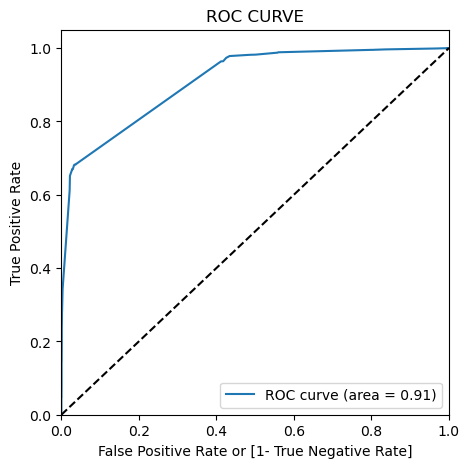

In [446]:
# calling rec_plot function
roc_plot(y_train_pred1.Converted,y_train_pred1["Lead Score Probability"])

#### This indicates that it is good predictive model as ROC curve area is 0.91 which means 91%

# 13. Optimal cut-off point

In [447]:
# creating columns consisting of various probability cutoffs
cut_num= [float(x)/10 for x in range(10)]
for i in cut_num:
    y_train_pred1[i]=y_train_pred1["Lead Score Probability"].map(lambda x : 1 if x>i else 0)

In [448]:
# checking for data frame after creating cutoffs
y_train_pred1.head()

,Converted,Lead Score Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.33,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.62,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.89,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1


In [449]:
# creating another data frame that consists of "Probability","Accuracy","Sensitivity","Specificity"
df_cut=pd.DataFrame(columns=["Probability","Accuracy","Sensitivity","Specificity"])
cut_num1=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cut_num1:
    con_mtr=metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1[i])
    total=sum(sum(con_mtr))
    accuracy=(con_mtr[0,0]+con_mtr[1,1])/total
    Sensitivity=con_mtr[1,1]/(con_mtr[1,0]+con_mtr[1,1])
    specificity=con_mtr[0,0]/(con_mtr[0,0]+con_mtr[0,1])
    df_cut.loc[i]=[i,accuracy, Sensitivity,specificity]

In [450]:
# checking for df_cut dataframe
df_cut

,Probability,Accuracy,Sensitivity,Specificity
0.00,0.00,0.39,1.00,0.00
0.10,0.10,0.72,0.98,0.56
0.20,0.20,0.72,0.98,0.56
0.30,0.30,0.73,0.96,0.59
0.40,0.40,0.86,0.68,0.96
0.50,0.50,0.86,0.68,0.97
0.60,0.60,0.85,0.67,0.97
0.70,0.70,0.86,0.67,0.97
0.80,0.80,0.86,0.67,0.97
0.90,0.90,0.74,0.34,1.00


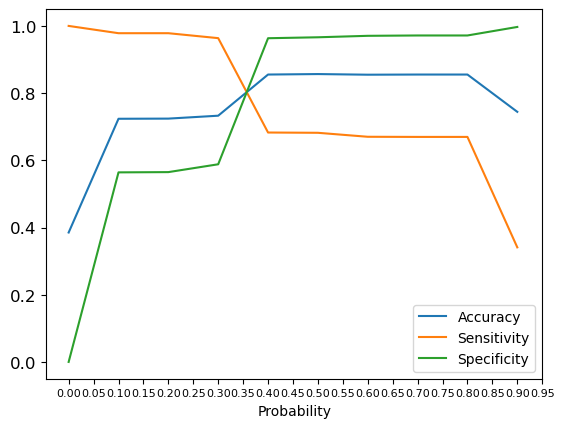

In [451]:
# plotting of curves for "Accuracy","Sensitivity","Specificity" of different Probabilities
df_cut.plot.line(x= "Probability", y=["Accuracy","Sensitivity","Specificity"])
plt.xticks(np.arange(0,1, step=.05), size=8)
plt.yticks(size=12)
plt.show()

#### optimal cutoff came to be 0.35 according to this plot

In [452]:
# Creating column for final predicted value with final cuttoff that is 0.35
y_train_pred1["Predicted_final"]=y_train_pred1["Lead Score Probability"].map(lambda x: 1 if x>0.35 else 0 )

In [453]:
# checking for data frame
y_train_pred1.head()

,Converted,Lead Score Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,0,0.33,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.62,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.89,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [454]:
# assigning of the lead scores to the final data frame
y_train_pred1["Lead Score"]=y_train_pred1["Lead Score Probability"].map(lambda x: round(x*100))

In [455]:
# checking for lead score column in the dataframe
y_train_pred1.head()

,Converted,Lead Score Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final,Lead Score
0,0,0.33,3009,0,1,1,1,1,0,0,0,0,0,0,0,33
1,0,0.62,1012,1,1,1,1,1,1,1,1,0,0,0,1,62
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.89,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [456]:
# again checking overall accuracy of the model
accuracy= metrics.accuracy_score(y_train_pred1.Converted, y_train_pred1.Predicted_final)
accuracy

0.8552983782081562

In [457]:
# again creating confusion matrix
con_marx1=metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted_final)
con_marx1

array([[3762,  143],
       [ 776, 1670]], dtype=int64)

In [458]:
# calculating values
# True Positive
TP1=con_marx1[1,1]
print(TP1)
# True Negative
TN1=con_marx1[0,0]
print(TN1)
# False Positive
FP1=con_marx1[0,1]
print(FP1)
# False Negative
FN1=con_marx1[1,0]
print(FN1)

1670
3762
143
776


In [459]:
# Calculating sensitivity
round((TP1/float(TP1+FN1)),2)

0.68

In [460]:
# Calculating specificity
round((TN1/float(TN1+FP1)),2)

0.96

In [461]:
# calcualting false positive rate
FPR1=round((FP1/float(TN1+FP1)),2)
FPR1

0.04

In [462]:
# positive predictive value 
print (TP1 / float(TP1+FP1))

0.9211252068394925


In [463]:
# Negative predictive value
print (TN1 / float(TN1+ FN1))

0.8289995592772146


# 14. Precision and Recall

In [464]:
# calculation of precision
precision=round(TP1/float(TP1+FP1),2)
precision

0.92

In [465]:
# calculation of recall
precision=round(TP1/float(TP1+FN1),2)
precision

0.68

In [466]:
# using precision score function from sklearn to calculate precision
from sklearn.metrics import precision_score
precision_score(y_train_pred1.Converted, y_train_pred1.Predicted_final)

0.9211252068394925

In [467]:
# using precision score function from sklearn to calculate precision
from sklearn.metrics import recall_score
recall_score(y_train_pred1.Converted, y_train_pred1.Predicted_final)

0.6827473426001636

In [468]:
# plotting the curse for precision recall tradeoff
# importing the library
from sklearn.metrics import precision_recall_curve

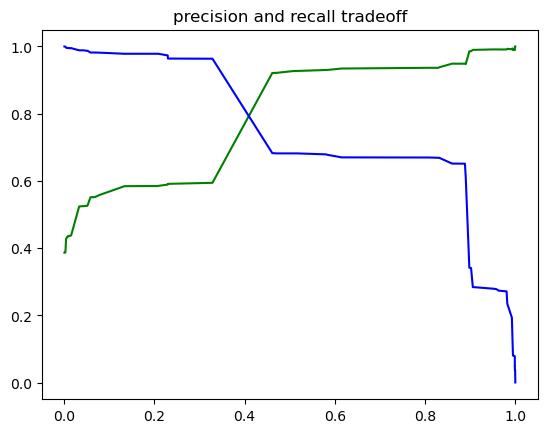

In [469]:
# plotting curve
p,r, threshold=precision_recall_curve(y_train_pred1.Converted,y_train_pred1["Lead Score Probability"])
plt.title("precision and recall tradeoff")
# plotting of precision
plt.plot(threshold, p[:-1],"g-")
# plotting of recall
plt.plot(threshold, r[:-1],"b-")
plt.show()

#### we can see that precision and recall are inversly related

# 15. Prediction on Test set

In [470]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [471]:
X_test=X_test[supp_col2]

In [472]:
# checking for dimensions
X_test.shape

(2723, 12)

In [473]:
# seeing values
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,0,1,0,0
1490,0,0,0,0,1,0,0,0,0,1,0,0
7936,0,0,0,0,0,0,0,0,0,1,0,0
4216,0,1,0,0,0,0,1,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,0,1,0,0


In [474]:
# adding constant to the X_test
X_test_sm=sm.add_constant(X_test)

In [475]:
# making predictions on the test
y_test_pred=result3.predict(X_test_sm)

In [476]:
# lookinf for values
y_test_pred

3271   0.33
1490   0.90
7936   0.33
4216   1.00
3830   0.33
       ... 
850    0.33
2879   0.02
6501   0.89
7155   0.33
376    0.33
Length: 2723, dtype: float64

In [477]:
# converting y_test_pred to data frame
y_test_pred_df=pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
3271,0.33
1490,0.90
7936,0.33
4216,1.00
3830,0.33


In [478]:
# converting y_test to data frame
y_test_df=pd.DataFrame(y_test)

In [479]:
# putting prospect id to index
y_test_df["Prospect ID"]=y_test_df.index

In [480]:
# we will remove index from both the dataframes
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [481]:
# concatenating both the dataframes
y_final_pred=pd.concat([y_test_df,y_test_pred_df], axis=1)

In [482]:
# checking for values
y_final_pred.head()

,Converted,Prospect ID,0
0,0,3271,0.33
1,1,1490,0.90
2,0,7936,0.33
3,1,4216,1.00
4,0,3830,0.33


In [483]:
# now we will rename columns
y_final_pred=y_final_pred.rename(columns={0: "Lead Score Probability1"})
# checking for data frame
y_final_pred.head()

,Converted,Prospect ID,Lead Score Probability1
0,0,3271,0.33
1,1,1490,0.90
2,0,7936,0.33
3,1,4216,1.00
4,0,3830,0.33


In [484]:
# rearranging the columns
y_final_pred=y_final_pred.reindex(["Prospect ID","Converted","Lead Score Probability1"], axis=1)

In [485]:
# adding one more column and naming it lead score
y_final_pred["Lead Score"]=round((y_final_pred["Lead Score Probability1"]*100),0)

In [486]:
# converting Lead Score column to integer type
y_final_pred["Lead Score"]=y_final_pred["Lead Score"].astype("int")

In [487]:
# looking for values
y_final_pred.head()

,Prospect ID,Converted,Lead Score Probability1,Lead Score
0,3271,0,0.33,33
1,1490,1,0.90,90
2,7936,0,0.33,33
3,4216,1,1.00,100
4,3830,0,0.33,33


In [488]:
# mapping lead score probability
y_final_pred["Final Predicted"]=y_final_pred["Lead Score Probability1"].map(lambda x : 1 if x >0.35 else 0)

In [489]:
# classifying leads as hot lead and cold lead based on lead score
y_final_pred["Lead_Type"]=y_final_pred["Lead Score"].map(lambda x : "Hot Lead" if x > 35 else "Cold Lead")

In [490]:
# sorting the data frame and keeping hot leads on the top of the list
y_final_pred.sort_values(by="Lead Score", ascending=False)

,Prospect ID,Converted,Lead Score Probability1,Lead Score,Final Predicted,Lead_Type
1361,2118,1,1.00,100,1,Hot Lead
287,7653,1,1.00,100,1,Hot Lead
280,5797,1,1.00,100,1,Hot Lead
1644,7537,1,1.00,100,1,Hot Lead
2404,7021,1,1.00,100,1,Hot Lead
...,...,...,...,...,...,...
2062,2228,0,0.00,0,0,Cold Lead
2063,3014,0,0.00,0,0,Cold Lead
2065,7917,0,0.00,0,0,Cold Lead
2069,6392,0,0.00,0,0,Cold Lead


In [491]:
# checking for accuracy of the final model
metrics.accuracy_score(y_final_pred.Converted, y_final_pred["Final Predicted"])

0.8461255967682703

In [492]:
# checking for confusion matrix of the final model
con_marx2=metrics.confusion_matrix(y_final_pred.Converted, y_final_pred["Final Predicted"])
con_marx2

array([[1662,   72],
       [ 347,  642]], dtype=int64)

In [493]:
# calculating values
# True Positive
TP2=con_marx2[1,1]
print(TP2)
# True Negative
TN2=con_marx2[0,0]
print(TN2)
# False Positive
FP2=con_marx2[0,1]
print(FP2)
# False Negative
FN2=con_marx2[1,0]
print(FN2)

642
1662
72
347


In [494]:
# calculating sensitivity of the final model
TP/float(TP+FN)

0.6819296811120196

In [495]:
# calculating specificity of the final model
TN/float(TN+FP)

0.9661971830985916

In [496]:
# calculating precsion score of final model
precision_score(y_final_pred.Converted, y_final_pred["Final Predicted"])

0.8991596638655462

In [497]:
# calculating recall score of final model
recall_score(y_final_pred.Converted, y_final_pred["Final Predicted"])

0.6491405460060667

#### we will observe that there is least difference between the metrices of the test and train data set so we can say that it is accrate model to predict for hot leads and cold leads

In [498]:
# getting co-eeicients of the features for our final model
pd.options.display.float_format="{:.2f}".format
new_params=result3.params[1:]
new_params

Do Not Email                                           -1.75
Lead Origin_Lead Add Form                               2.79
Last Activity_Had a Phone Conversation                  3.04
Last Activity_Unsubscribed                              2.53
What is your current occupation_Working Professional    2.93
Tags_Busy                                               2.93
Tags_Closed by Horizzon                                 8.15
Tags_Lost to EINS                                       8.07
Tags_Ringing                                           -1.57
Tags_Will revert after reading the email                3.43
Tags_switched off                                      -1.28
Last Notable Activity_SMS Sent                          2.81
dtype: float64

#### Equation of the final model
#### log odds = -4.12 - 1.75 * Do Not Email + 2.79 * Lead Origin_Lead Add Form + 3.04 * Last Activity_Had a Phone Conversation + 2.53 * Last Activity_Unsubscribed + 2.93 * What is your current occupation_Working Professional + 2.93 * Tags_Busy +              8.15 * Tags_Closed by Horizzon + 8.07 * Tags_Lost to EINS - 1.57 * Tags_Ringing + 3.43 * Tags_Will revert after reading the email   - 1.28 * Last Notable Activity_SMS Sent + 2.81 * Last Notable Activity_SMS Sent